In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem

In [3]:
import sys,os
import rdkit
import networkx as nx
import pandas as pd

In [137]:
sys.path.insert(0,"../../src/main/")

In [138]:
from importlib import reload
import molutils

In [4]:
structures=pd.read_csv("../input/structures.csv")

In [5]:
structures.head()

molecule_name  atom_index atom         x         y         z
0  dsgdb9nsd_000001           0    C -0.012698  1.085804  0.008001
1  dsgdb9nsd_000001           1    H  0.002150 -0.006031  0.001976
2  dsgdb9nsd_000001           2    H  1.011731  1.463751  0.000277
3  dsgdb9nsd_000001           3    H -0.540815  1.447527 -0.876644
4  dsgdb9nsd_000001           4    H -0.523814  1.437933  0.906397

In [18]:
n_molecule=len(set(structures['molecule_name']))
n_molecule

130775

In [12]:
set(structures['atom'])

{'C', 'F', 'H', 'N', 'O'}

In [13]:
structures['atom_index'].min(),structures['atom_index'].max()

(0, 28)

In [6]:
traintest=pd.concat([pd.read_csv("../input/train.csv"),pd.read_csv("../input/test.csv")])

In [7]:
traintest.head()

atom_index_0  atom_index_1  id     molecule_name  scalar_coupling_constant  \
0             1             0   0  dsgdb9nsd_000001                   84.8076   
1             1             2   1  dsgdb9nsd_000001                  -11.2570   
2             1             3   2  dsgdb9nsd_000001                  -11.2548   
3             1             4   3  dsgdb9nsd_000001                  -11.2543   
4             2             0   4  dsgdb9nsd_000001                   84.8074   

   type  
0  1JHC  
1  2JHH  
2  2JHH  
3  2JHH  
4  1JHC

In [14]:
traintest['istest']=traintest['scalar_coupling_constant'].isnull()

In [20]:
set(traintest['type'])

{'1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'}

In [11]:
len(set(structures['molecule_name']))

130775

In [9]:
traintest.isnull().sum()

atom_index_0                      0
atom_index_1                      0
id                                0
molecule_name                     0
scalar_coupling_constant    2505542
type                              0
dtype: int64

In [16]:
traintest.groupby('istest')['molecule_name'].count()/len(traintest)

istest
False    0.650244
True     0.349756
Name: molecule_name, dtype: float64

In [37]:
traintest.groupby('type')['molecule_name'].count().sort_values()


type
1JHN      67558
2JHN     183677
3JHN     257031
2JHH     581162
3JHH     908046
1JHC    1090025
2JHC    1753812
3JHC    2322378
Name: molecule_name, dtype: int64

In [70]:
print ("All type name start from H and end with others")

All type name start from H and end with others


In [30]:
a=traintest.groupby('type')['molecule_name'].count().sort_values()/len(traintest)
a

type
1JHN    0.009431
2JHN    0.025640
3JHN    0.035880
2JHH    0.081126
3JHH    0.126757
1JHC    0.152160
2JHC    0.244820
3JHC    0.324187
Name: molecule_name, dtype: float64

In [40]:
traintest.groupby('type')['molecule_name'].nunique().sort_values()

type
1JHN     44141
2JHN     62079
3JHN     70414
3JHH    118341
2JHH    125059
1JHC    130341
3JHC    130443
2JHC    130470
Name: molecule_name, dtype: int64

In [39]:
traintest.groupby('type')['molecule_name'].nunique().sort_values()/n_molecule

type
1JHN    0.337534
2JHN    0.474701
3JHN    0.538436
3JHH    0.904921
2JHH    0.956291
1JHC    0.996681
3JHC    0.997461
2JHC    0.997668
Name: molecule_name, dtype: float64

In [34]:
print ("percentages by types")
a.to_dict()

percentages by types


{'1JHN': 0.009430615985702339,
 '2JHN': 0.025640001959884078,
 '3JHN': 0.03587969829511024,
 '2JHH': 0.08112607903553602,
 '3JHH': 0.1267567589826973,
 '1JHC': 0.15215973222734822,
 '2JHC': 0.2448196732158529,
 '3JHC': 0.3241874402978689}

In [36]:
print ("weights by types")
((1/a)*a.mean()).to_dict()

weights by types


{'1JHN': 13.254701515734627,
 '2JHN': 4.875194635147569,
 '3JHN': 3.483864300415125,
 '2JHH': 1.5408115551257653,
 '3JHH': 0.9861407076293492,
 '1JHC': 0.8215051260292195,
 '2JHC': 0.5105798825643797,
 '3JHC': 0.3855794039557729}

In [19]:
traintest.groupby('istest')['molecule_name'].nunique()/n_molecule

istest
False    0.649994
True     0.350006
Name: molecule_name, dtype: float64

In [25]:
a=traintest[traintest['istest']].groupby(['type'])['molecule_name'].count()/traintest['istest'].sum()
b=traintest[~traintest['istest']].groupby(['type'])['molecule_name'].count()/(~traintest['istest']).sum()
pd.concat([a,b],1)

molecule_name  molecule_name
type                              
1JHC       0.151907       0.152296
1JHN       0.009657       0.009309
2JHC       0.244713       0.244877
2JHH       0.081071       0.081156
2JHN       0.025713       0.025601
3JHC       0.324081       0.324245
3JHH       0.126693       0.126791
3JHN       0.036166       0.035726

In [46]:
np.round(structures[['x','y','z']].describe(),3).astype(np.float32)

x            y            z
count  2358657.000  2358657.000  2358657.000
mean         0.095       -0.334        0.062
std          1.655        1.989        1.446
min         -9.235       -9.934       -9.135
25%         -0.875       -1.826       -0.842
50%          0.052       -0.404        0.011
75%          1.116        1.374        0.939
max          9.382       10.182        7.895

In [53]:
a=structures.groupby("molecule_name")[['x','y','z']].max()
np.round(a.describe(),3).astype(np.float32)

x           y           z
count  130775.000  130775.000  130775.000
mean        2.356       2.323       2.170
std         1.147       1.032       1.095
min        -2.509      -2.852      -1.865
25%         1.355       1.870       1.239
50%         2.280       2.001       2.124
75%         3.153       2.141       2.870
max         9.382      10.182       7.895

In [60]:
b=structures.groupby("molecule_name")[['x','y','z']].min()
b.columns=['mx','my','mz']
np.round(b.describe(),3).astype(np.float32)

mx          my          mz
count  130775.000  130775.000  130775.000
mean       -2.135      -2.950      -2.030
std         1.289       1.456       1.039
min        -9.235      -9.934      -9.135
25%        -3.004      -3.887      -2.487
50%        -1.950      -2.982      -2.008
75%        -1.027      -2.135      -1.201
max         2.674       1.654       1.951

In [62]:
pd.concat([a,b],1).sort_values('x').head()

x         y         z        mx        my        mz
molecule_name                                                               
dsgdb9nsd_116777 -2.508768  2.449360  1.249353 -7.476476 -4.316991 -4.138956
dsgdb9nsd_003101 -2.407779  2.982016  1.425459 -6.662983 -1.785995 -3.481630
dsgdb9nsd_053561 -2.363172  0.995539  3.086946 -8.197347 -4.297387 -3.555835
dsgdb9nsd_117231 -0.997462  2.800791  0.797182 -5.187555 -3.562126 -4.049546
dsgdb9nsd_119977 -0.989918  2.047639  1.961720 -5.315849 -4.026725 -3.438677

In [67]:
mol_atom_dict= structures.set_index(['molecule_name','atom_index'])['atom'].to_dict()

In [69]:
mol_atom_dict[('dsgdb9nsd_000001', 0)]

'C'

In [73]:
traintest['atom0']=traintest[['molecule_name','atom_index_0']].apply(lambda u:mol_atom_dict[tuple(u.values)], axis=1 )
traintest['atom1']=traintest[['molecule_name','atom_index_1']].apply(lambda u:mol_atom_dict[tuple(u.values)], axis=1 )

In [77]:
traintest['a01']=traintest[['atom0','atom1']].apply(lambda u: "".join(u.values),axis=1)

In [80]:
(traintest['type'].map(lambda u: u[2:])!=traintest['a01']).sum()

0

In [81]:
print ("index 0 is always H")

index 0 is always H


In [85]:
(traintest['atom_index_0']==traintest['atom_index_1']).sum()

0

In [86]:
a=traintest[traintest['a01']=='HH']
(a['atom_index_0']>a['atom_index_1']).sum()

0

In [87]:
print ("for HH index 0 is always the smaller index H")

for HH index 0 is always the smaller index H


# examine shorted path

In [88]:
sp = pd.read_csv("../input/traintest_shortest_path.csv", index_col=0)

/home/bo/miniconda2/envs/deepchem/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [89]:
sp.head()

key shorted_path shorted_path_symbols
id                                                        
0   dsgdb9nsd_000001-1-0          1-0                   HC
1   dsgdb9nsd_000001-1-2        1-0-2                  HCH
2   dsgdb9nsd_000001-1-3        1-0-3                  HCH
3   dsgdb9nsd_000001-1-4        1-0-4                  HCH
4   dsgdb9nsd_000001-2-0          2-0                   HC

In [90]:
sp.shorted_path_symbols.value_counts()

HCCC    1810032
HCC     1607633
HC      1090018
HCCH     802854
HCH      568624
HCCN     216287
HCNC     185790
HCN      177778
HCOC     126299
HNCC     103624
HNC       97234
HOCC      91569
HN        67557
HOC       48940
HCNH      37380
HCOH      28383
HNCN      25340
HNCH      20518
HOCH      18903
HNH       12530
HCNN      10176
HNN        4029
HOCN       3414
HNNC       3183
HONC       1862
HON        1862
HCON        968
HNNN        846
HOH           1
Name: shorted_path_symbols, dtype: int64

In [91]:
sp4=sp[sp['shorted_path_symbols'].map(lambda u: len(u)==4)]

In [93]:
sp4.shorted_path_symbols.value_counts()

HCCC    1810032
HCCH     802854
HCCN     216287
HCNC     185790
HCOC     126299
HNCC     103624
HOCC      91569
HCNH      37380
HCOH      28383
HNCN      25340
HNCH      20518
HOCH      18903
HCNN      10176
HOCN       3414
HNNC       3183
HONC       1862
HCON        968
HNNN        846
Name: shorted_path_symbols, dtype: int64

In [95]:
sp4=sp4[sp4['shorted_path_symbols'].map(lambda u: u.endswith('H'))]

In [96]:
sp4.shorted_path_symbols.value_counts()

HCCH    802854
HCNH     37380
HCOH     28383
HNCH     20518
HOCH     18903
Name: shorted_path_symbols, dtype: int64

In [ ]:
print ("it is better to adjust HNCH to HCNH and HOCH to HCOH")

In [97]:
sp4[sp4.shorted_path_symbols=="HCOH"].head()

key shorted_path shorted_path_symbols
id                                                         
49   dsgdb9nsd_000008-2-5      2-0-1-5                 HCOH
52   dsgdb9nsd_000008-3-5      3-0-1-5                 HCOH
54   dsgdb9nsd_000008-4-5      4-0-1-5                 HCOH
167  dsgdb9nsd_000014-6-8      6-1-2-8                 HCOH
170  dsgdb9nsd_000014-7-8      7-1-2-8                 HCOH

In [98]:
sp4[sp4.shorted_path_symbols=="HOCH"].head()

key shorted_path shorted_path_symbols
id                                                         
411  dsgdb9nsd_000033-4-5      4-0-1-5                 HOCH
412  dsgdb9nsd_000033-4-6      4-0-1-6                 HOCH
425  dsgdb9nsd_000034-4-5      4-0-1-5                 HOCH
426  dsgdb9nsd_000034-4-6      4-0-1-6                 HOCH
447  dsgdb9nsd_000038-4-5      4-0-1-5                 HOCH

In [99]:
mergedmols={}
suppl = Chem.SDMolSupplier('../input/merged_mols.sdf',removeHs=False)
for mol in suppl:
    name=mol.GetProp("_Name").replace(".xyz","")
    mergedmols[name]=mol
len(mergedmols)

130774

In [100]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize=(600,400)
 
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

In [109]:
distance(mol,0,4)

0.9626533176590626

In [108]:
def distance(mol, i,j ):
    c = mol.GetConformer()
    a1 = c.GetAtomPosition(i)
    a2 = c.GetAtomPosition(j)
    a1=np.array([a1.x,a1.y,a1.z])
    a2=np.array([a2.x,a2.y,a2.z])
    return np.sqrt(np.sum((a1-a2)**2))

0.9626533176590626 1.4120188738115367 1.1008877236121766


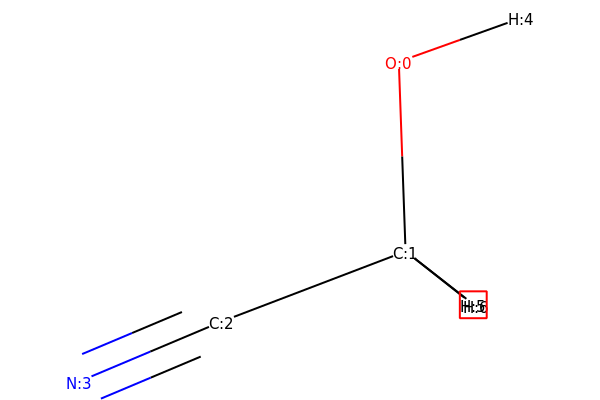

In [113]:
mol=mergedmols['dsgdb9nsd_000034']
print (distance(mol,0,4),distance(mol,0,1),distance(mol,1,5),)
mol_with_atom_index(mol)

0.9612907208539985 1.9393320757415426 1.1003703149394752


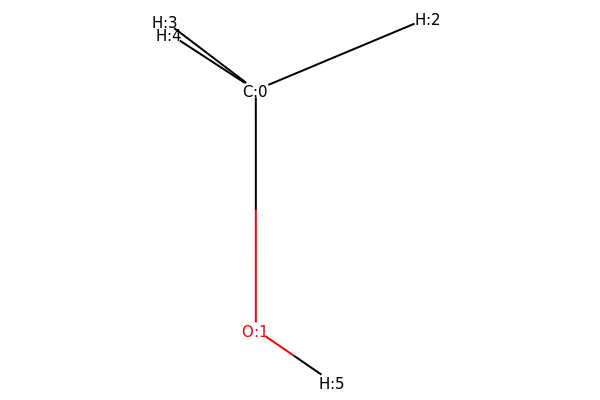

In [115]:
mol=mergedmols['dsgdb9nsd_000008']
print (distance(mol,1,5),distance(mol,5,0),distance(mol,0,2),)
mol_with_atom_index(mol)

0.9615445283500915 1.9480522118259562 1.1021245074854291


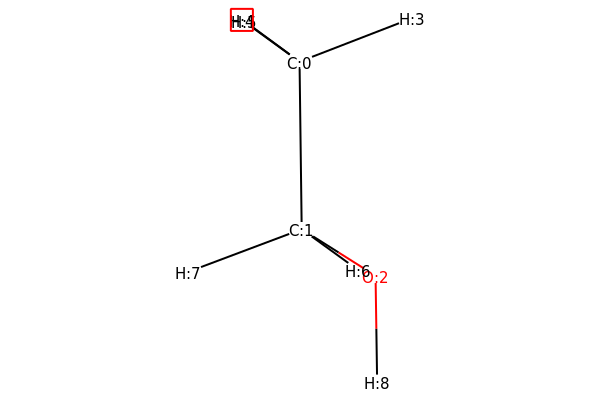

In [120]:
mol=mergedmols['dsgdb9nsd_000014']
print (distance(mol,2,8),distance(mol,8,1),distance(mol,1,7),)
mol_with_atom_index(mol)

In [123]:
sp[sp.shorted_path_symbols=="HNNN"].head()

key shorted_path shorted_path_symbols
id                                                            
3277    dsgdb9nsd_000166-5-3      5-0-4-3                 HNNN
15262  dsgdb9nsd_000728-10-3     10-5-4-3                 HNNN
15291  dsgdb9nsd_000731-10-5     10-3-4-5                 HNNN
15404   dsgdb9nsd_000739-9-5      9-3-4-5                 HNNN
15651   dsgdb9nsd_000761-9-5      9-3-4-5                 HNNN

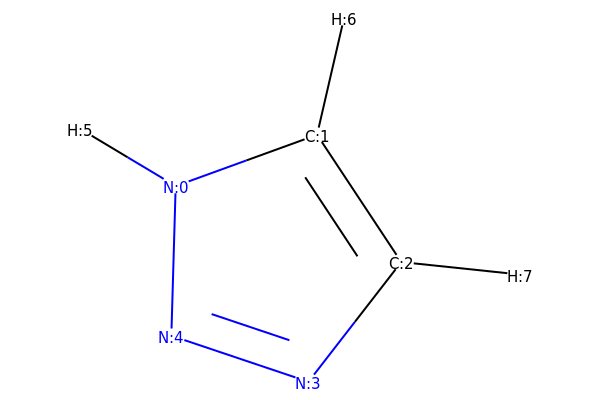

In [126]:
mol=mergedmols['dsgdb9nsd_000166']
mol_with_atom_index(mol)

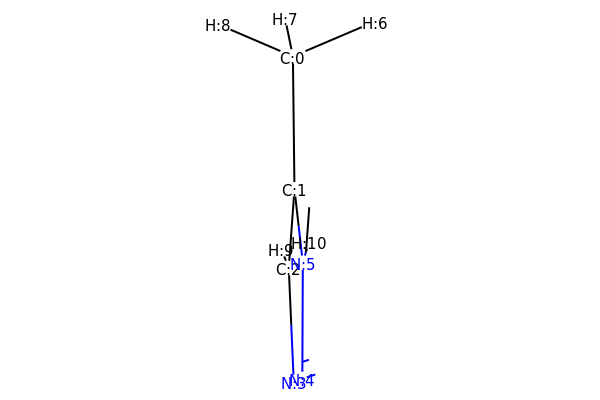

In [127]:
mol=mergedmols['dsgdb9nsd_000728']
mol_with_atom_index(mol)

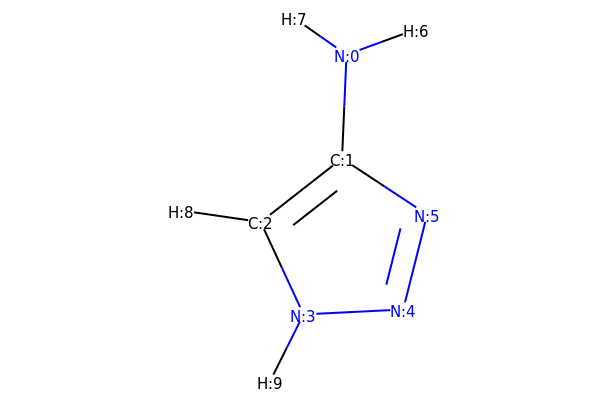

In [128]:
mol=mergedmols['dsgdb9nsd_000761']
mol_with_atom_index(mol)

C2H4N4


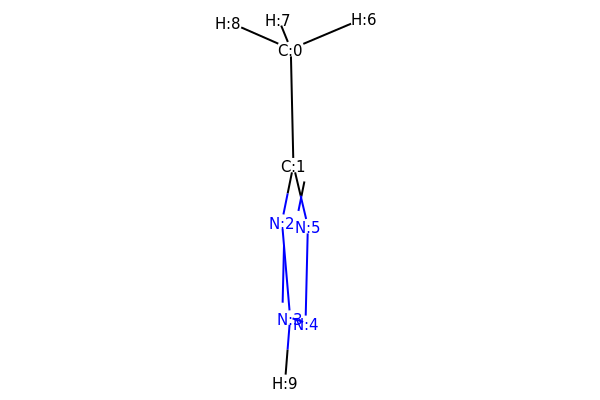

In [131]:
mol=mergedmols['dsgdb9nsd_000739']
print (Chem.rdMolDescriptors.CalcMolFormula(mol))
mol_with_atom_index(mol)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

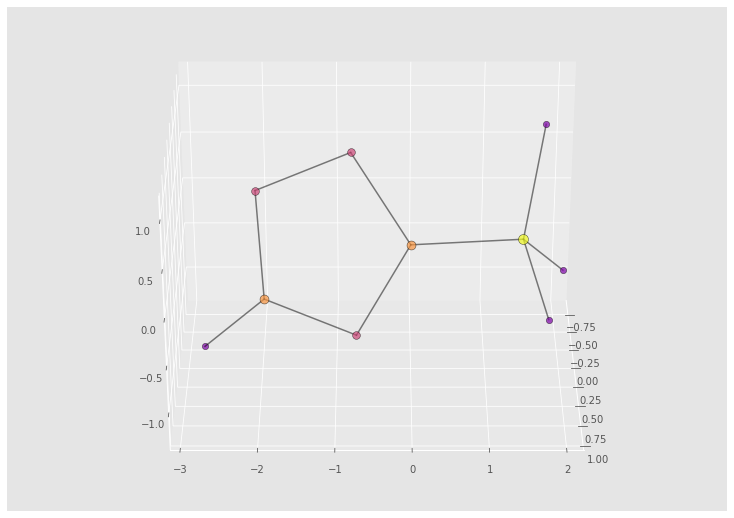

In [147]:
network_plot_3D(molutils.mol_to_nx(mol),0)

In [132]:
print (Chem.MolToMolBlock(mol))

dsgdb9nsd_000739.xyz
     RDKit          3D

 10 10  0  0  0  0  0  0  0  0999 V2000
   -0.0232    1.4799    0.0161 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0103   -0.0083   -0.0187 C   0  0  0  0  0  0  0  0  0  1  0  0
   -0.1366   -0.7331   -1.1243 N   0  0  0  0  0  0  0  0  0  2  0  0
   -0.0317   -1.9641   -0.6393 N   0  0  0  0  0  0  0  0  0  3  0  0
    0.1661   -2.0308    0.6678 N   0  0  0  0  0  0  0  0  0  4  0  0
    0.1956   -0.7914    1.0800 N   0  0  0  0  0  0  0  0  0  5  0  0
    0.9171    1.8774    0.4090 H   0  0  0  0  0  0  0  0  0  6  0  0
   -0.1838    1.8747   -0.9880 H   0  0  0  0  0  0  0  0  0  7  0  0
   -0.8264    1.8320    0.6699 H   0  0  0  0  0  0  0  0  0  8  0  0
   -0.0970   -2.7882   -1.2176 H   0  0  0  0  0  0  0  0  0  9  0  0
  1  2  1  0
  1  7  1  0
  1  8  1  0
  1  9  1  0
  2  3  2  0
  2  6  1  0
  3  4  1  0
  4  5  1  0
  4 10  1  0
  5  6  2  0
M  END



In [146]:
from mpl_toolkits.mplot3d import Axes3D

def network_plot_3D(G, angle, save=False):
 
    # Get node positions
    pos = nx.get_node_attributes(G, 'xyz')
    
    # Get number of nodes
    n = G.number_of_nodes()
 
    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])
 
    # Define color range proportional to number of edges adjacent to a single node
    colors = [plt.cm.plasma(G.degree(i)/edge_max) for i in range(n)] 
 
    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            
            # Scatter plot
            ax.scatter(xi, yi, zi, c=colors[key], s=20+20*G.degree(key), edgecolors='k', alpha=0.7)
        
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for i,j in enumerate(G.edges()):
 
            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
        # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)
    
    # Set the initial view
    ax.view_init(30, angle)
 
    # Hide the axes
    #ax.set_axis_off()
 
    plt.show()
    
    return


# examine shorted path (fixed)

In [148]:
sp = pd.read_csv("../input/traintest_shortest_path.csv", index_col=0)

/home/bo/miniconda2/envs/deepchem/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [149]:
sp.head()

key shorted_path shorted_path_symbols
id                                                        
0   dsgdb9nsd_000001-1-0          1-0                   HC
1   dsgdb9nsd_000001-1-2        1-0-2                  HCH
2   dsgdb9nsd_000001-1-3        1-0-3                  HCH
3   dsgdb9nsd_000001-1-4        1-0-4                  HCH
4   dsgdb9nsd_000001-2-0          2-0                   HC

In [150]:
sp.shorted_path_symbols.value_counts()

HCCC    1810032
HCC     1607633
HC      1090017
HCCH     802854
HCH      568624
HCCN     216287
HCNC     185790
HCN      177778
HCOC     126299
HNCC     103624
HNC       97234
HOCC      91569
HN        67557
HCNH      57898
HOC       48940
HCOH      47286
HNCN      25340
HNH       12530
HCNN      10176
HNN        4029
HOCN       3414
HNNC       3183
HONC       1862
HON        1862
HCON        968
HNNN        846
HOH           1
Name: shorted_path_symbols, dtype: int64

In [151]:
sp4=sp[sp['shorted_path_symbols'].map(lambda u: len(u)==4)]

In [152]:
sp4.shorted_path_symbols.value_counts()

HCCC    1810032
HCCH     802854
HCCN     216287
HCNC     185790
HCOC     126299
HNCC     103624
HOCC      91569
HCNH      57898
HCOH      47286
HNCN      25340
HCNN      10176
HOCN       3414
HNNC       3183
HONC       1862
HCON        968
HNNN        846
Name: shorted_path_symbols, dtype: int64

In [153]:
sp4=sp4[sp4['shorted_path_symbols'].map(lambda u: u.endswith('H'))]

In [154]:
sp4.shorted_path_symbols.value_counts()

HCCH    802854
HCNH     57898
HCOH     47286
Name: shorted_path_symbols, dtype: int64

In [155]:
print ("HNCH to HCNH and HOCH to HCOH have been adjusted")

HNCH to HCNH and HOCH to HCOH have been adjusted


In [156]:
sp4[sp4.shorted_path_symbols=="HCOH"].head()

key shorted_path shorted_path_symbols
id                                                         
49   dsgdb9nsd_000008-2-5      2-0-1-5                 HCOH
52   dsgdb9nsd_000008-3-5      3-0-1-5                 HCOH
54   dsgdb9nsd_000008-4-5      4-0-1-5                 HCOH
167  dsgdb9nsd_000014-6-8      6-1-2-8                 HCOH
170  dsgdb9nsd_000014-7-8      7-1-2-8                 HCOH

In [157]:
sp4[sp4.shorted_path_symbols=="HOCH"].head()

Empty DataFrame
Columns: [key, shorted_path, shorted_path_symbols]
Index: []